# 作业要求

● 使用sklearn实现Lasso
● 数据要求：与线性回归相同，在数据中添加outliers
● 画出各参数随正则化参数变化的曲线


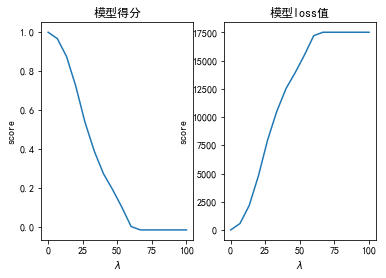

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, discriminant_analysis, model_selection
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
def lasso_alpha(x_train, x_test, y_train, y_test):
    alphas = np.linspace(0.1, 100,num = 16)
    scores = []
    loss = []
    for i, alpha in enumerate(alphas):
        lassoRegression = linear_model.Lasso(alpha=alpha)
        lassoRegression.fit(x_train, y_train)
        scores.append(lassoRegression.score(x_test, y_test))
        e = np.mean((lassoRegression.predict(x_test) - y_test) ** 2)
        loss.append(e)
    scores = np.array(scores)
    loss = np.array(loss)
    return alphas, scores, loss
def show_plot(alphas, scores,loss):
    figure = plt.figure()
    ax1 = figure.add_subplot(1, 2, 1)
    ax1.plot(alphas, scores)
    ax1.set_xlabel(r"$\lambda$")
    ax1.set_ylabel(r"score")
    ax1.set_title("模型得分")
    ax2 = figure.add_subplot(1, 2, 2)
    ax2.plot(alphas, loss)
    ax2.set_xlabel(r"$\lambda$")
    ax2.set_ylabel(r"score")
    ax2.set_title("模型loss值")
    plt.show()
if __name__=='__main__':
    x,y=make_regression(n_samples=200, n_features=5,n_targets=1,noise=1.5,random_state=1)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 2)
    alphas, scores,loss = lasso_alpha(x_train, x_test, y_train, y_test)
    show_plot(alphas, scores,loss)